Si el ejercicio lo solicita tendra que crear primero algun elemento modificado para poder realizar el
ejercicio (estilo mascara binaria por ejemplo).


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from matplotlib.pyplot import ylabel

In [6]:
def show_image(image, title=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

1. Suma de imagenes con ponderacion: Cargar dos imagenes del mismo tamaño y combınalas con una
ponderacion especıfica usando la funcion cv2.addWeighted().

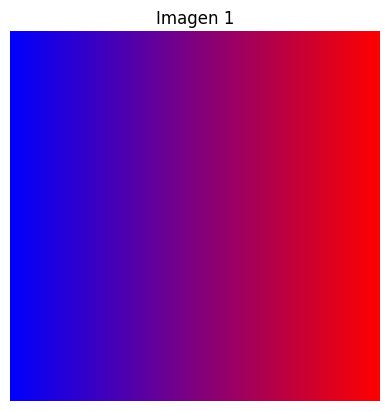

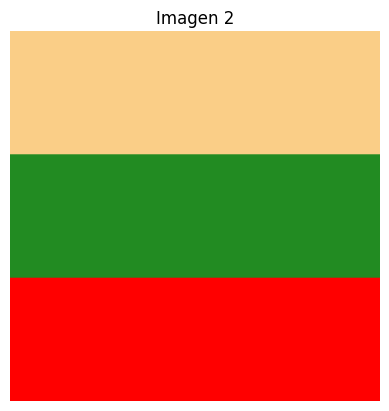

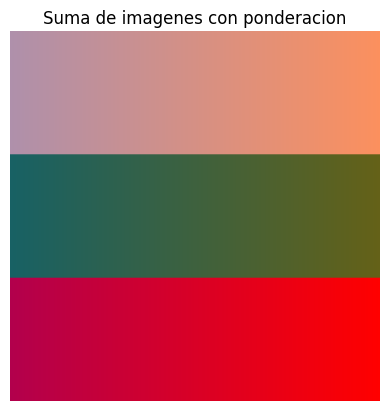

In [10]:
img1 = cv2.imread('img_color1.png')
img2 = cv2.imread('img_color2.png')

alfa = 0.3 # Ponderacion de la imagen 1
beta = 0.7 # Ponderacion de la imagen 2
gamma = 0 # desplazamiento

# Asegurarse de que las imagenes tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

suma_img = cv2.addWeighted(img1, alfa, img2, beta, gamma)

show_image(img1, 'Imagen 1')
show_image(img2, 'Imagen 2')
show_image(suma_img, 'Suma de imagenes con ponderacion')


2. Resta de imagenes: Realizar la resta de dos imagenes para resaltar las diferencias entre ellas con
cv2.subtract().

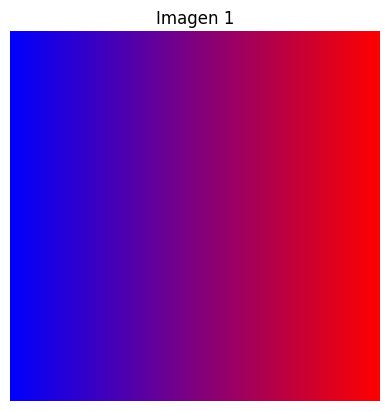

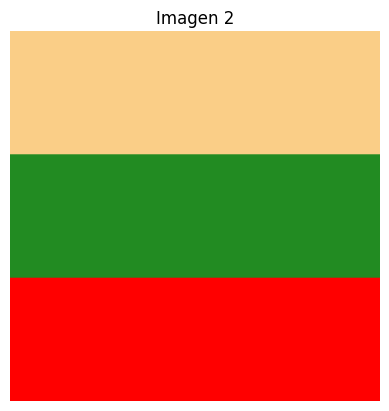

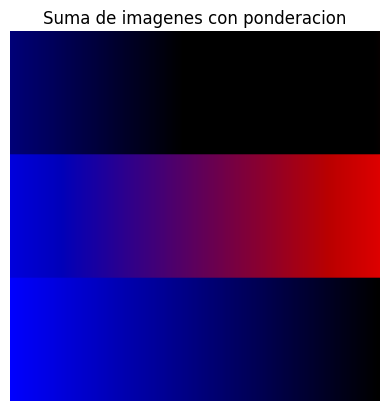

In [11]:
img1 = cv2.imread('img_color1.png')
img2 = cv2.imread('img_color2.png')

alfa = 0.3 # Ponderacion de la imagen 1
beta = 0.7 # Ponderacion de la imagen 2
gamma = 0 # desplazamiento

# Asegurarse de que las imagenes tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

suma_img = cv2.subtract(img1,img2)

show_image(img1, 'Imagen 1')
show_image(img2, 'Imagen 2')
show_image(suma_img, 'Suma de imagenes con ponderacion')

# Resalta la diferencia entre las 2 imagenes. Si son iguales, el resultado sera negro o algo cercano a eso. por el contrario, sera blanco si son iguales. Sirve para marcar diferencias de movimiento

3. (*) Multiplicacion y division de imagenes: Multiplicar y divide dos imagenes pıxel a pıxel utilizando
cv2.multiply() y cv2.divide(), observando como afecta el brillo y contraste.

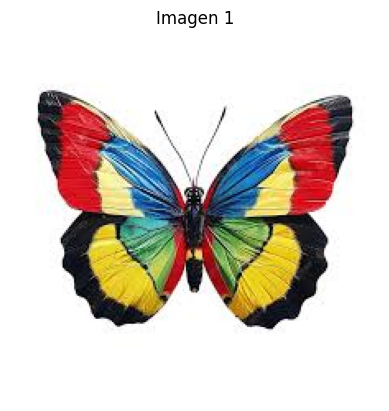

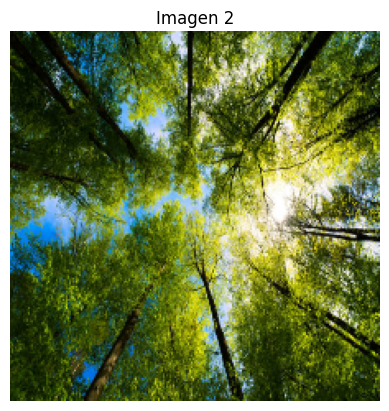

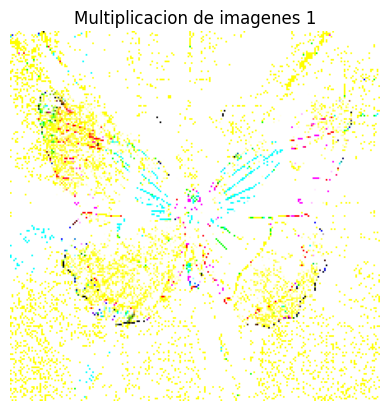

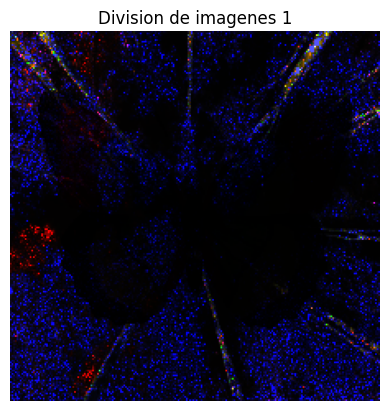

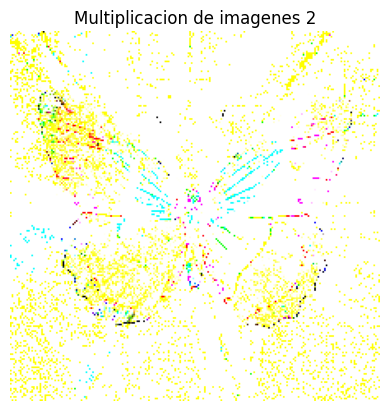

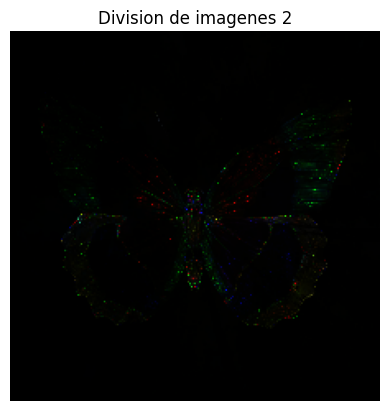

In [14]:
img1 = cv2.imread('mariposa.jpg')
img2 = cv2.imread('bosque.jpg')

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

img_mult1 = cv2.multiply(img1,img2)
img_div1 = cv2.divide(img1,img2)
img_mult2 = cv2.multiply(img2,img1)
img_div2 = cv2.divide(img2,img1)

show_image(img1, 'Imagen 1')
show_image(img2, 'Imagen 2')
show_image(img_mult1, 'Multiplicacion de imagenes 1')
show_image(img_div1, 'Division de imagenes 1')
show_image(img_mult2, 'Multiplicacion de imagenes 2')
show_image(img_div2, 'Division de imagenes 2')

4. Mascara binaria con operadores relacionales: Convierte una imagen a escala de grises y genera una
mascara binaria donde los valores sean mayores a un umbral con operadores relacionales (¿, ¡).


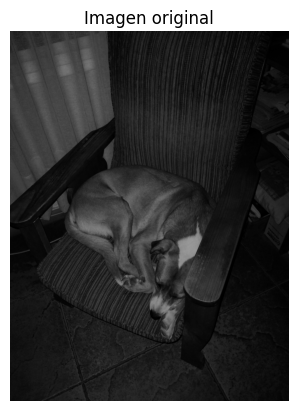

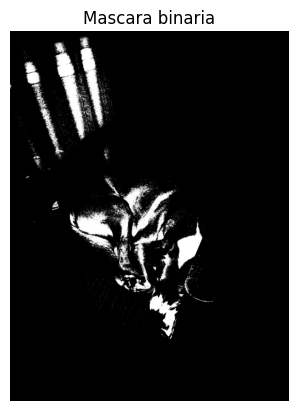

In [24]:
img = cv2.imread('felipe.jpg', cv2.IMREAD_GRAYSCALE)
umbral = 80

mascara = np.where(img > umbral, 255, 0).astype(np.uint8)

show_image(img, 'Imagen original')
show_image(mascara, 'Mascara binaria')


5. (*) Combinacion con operadores logicos: Usa operadores booleanos (cv2.bitwise and, cv2.bitwise or,
cv2.bitwise xor) para fusionar imagenes basandose en una mascara binaria. Describir que sucede en
cada caso

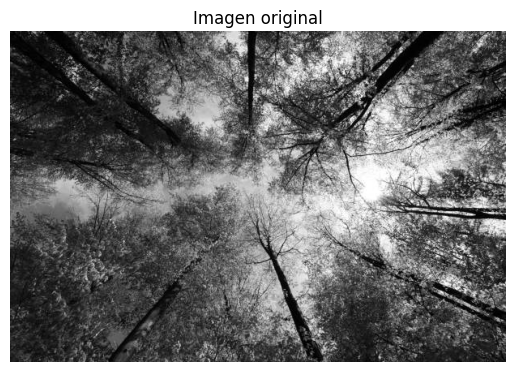

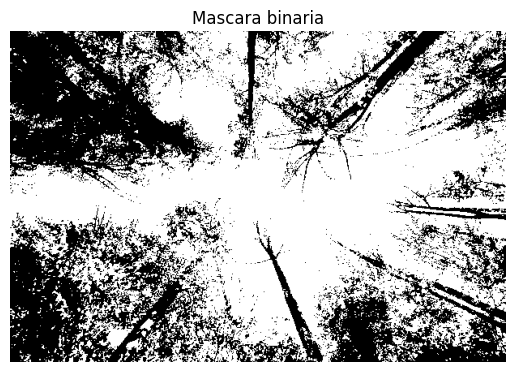

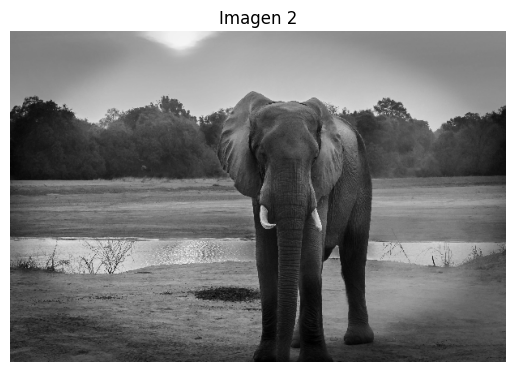

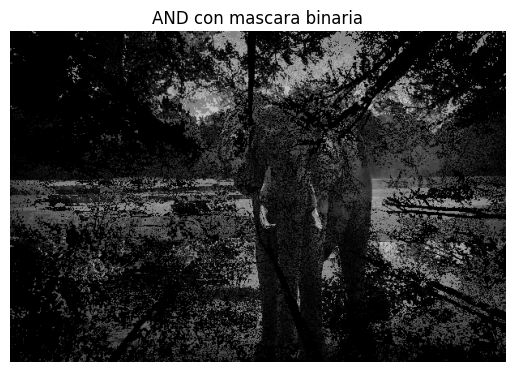

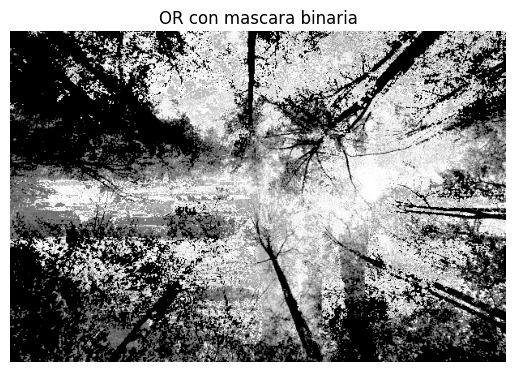

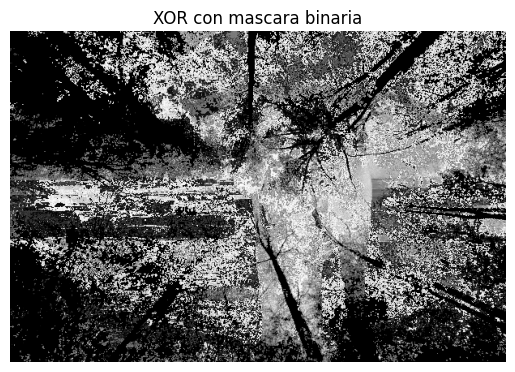

In [40]:
img = cv2.imread('bosque.jpg', cv2.IMREAD_GRAYSCALE)
umbral = 60
mascara = np.where(img > umbral, 255, 0).astype(np.uint8)

img2 = cv2.imread('elefante.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))

and_result = cv2.bitwise_and(img2, img, mask=mascara)
or_result = cv2.bitwise_or(img2, img, mask=mascara)
xor_result = cv2.bitwise_xor(img2, img, mask=mascara)

show_image(img, 'Imagen original')
show_image(mascara, 'Mascara binaria')
show_image(img2, 'Imagen 2')
show_image(and_result, 'AND con mascara binaria')
show_image(or_result, 'OR con mascara binaria')
show_image(xor_result, 'XOR con mascara binaria')


La mascara en cada una de las 3 operaciones delimita la zona en la cual se realizaran las comparaciones de bit a bit. Una vez delimitada la zona aplica la opracion correspondiente (and, or o xor) entre los bits que representan cada pixel.
 
Ej: pixel1 = 150, pixel2 = 200 y su respectivo valor binario es 10010110 y 11001000. Si aplicamos las operaciones bit a bit el resultado seria el siguiente:
##### and: 10010110 and 11001000 = 10000000 = 128 
##### or: 10010110 or 11001000 = 11011110 = 222
##### xor: 10010110 xor 11001000 = 01011110 = 94
Desde el punto de vista de la imagen resultante, el resultado de cada operacion es el siguiente:
##### and: Es una especie de fusion de ambas imagenes en donde se oscurece la imagen y utiliza de fondo la segunda imagen 
##### or: Fusiona ambas imagenes pero en este caso se un incremento del color blanco en el resultado. En este caso la imagen 2 utilizada de fondo no es tan clara
##### xor: En este caso se remarca mas el contraste entre ambas imagenes 



6. Creacion de una imagen compuesta: Utilizar una imagen con fondo negro y otra con fondo blanco,
aplicando una mascara binaria para superponer un mariposa de una imagen sobre otra.

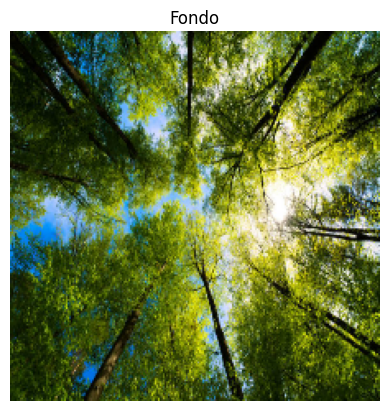

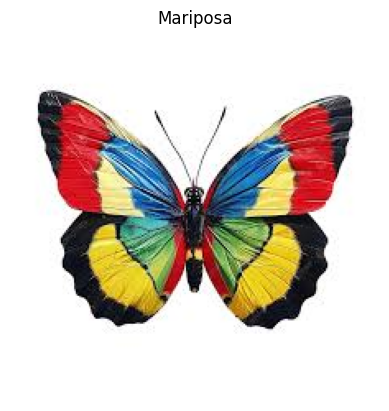

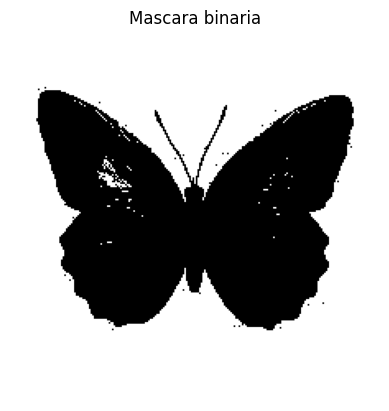

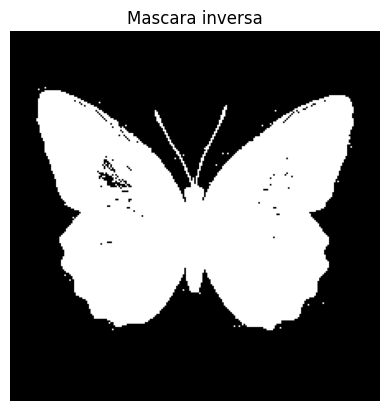

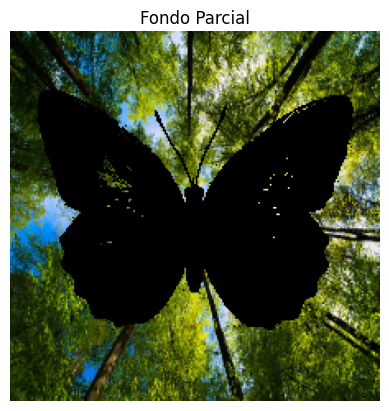

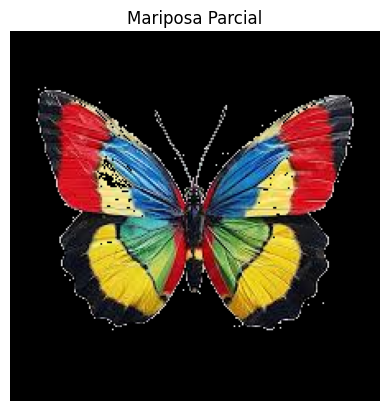

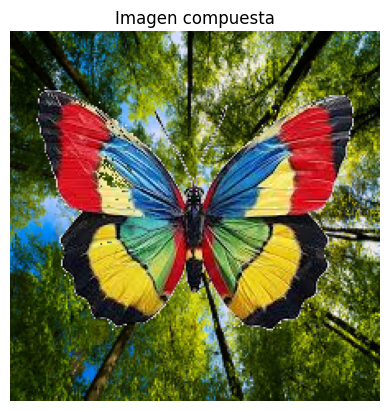

In [57]:
# Aplicar R:= (B AND NOT C) OR (A AND C)
img_mariposa = cv2.imread('mariposa.jpg')   #B
img_fondo = cv2.imread('bosque.jpg')  # A

img_fondo = cv2.resize(img_fondo, (img_mariposa.shape[1], img_mariposa.shape[0]))

mariposa_gris = cv2.cvtColor(img_mariposa, cv2.COLOR_BGR2GRAY)

# Crear la máscara
_, mascara = cv2.threshold(mariposa_gris, 235, 255, cv2.THRESH_BINARY) #C

# Convertimos a 3 canales para evitar errores con las imagenes a color
mascara = cv2.cvtColor(mascara, cv2.COLOR_GRAY2BGR)

# Crear la máscara inversa
mascara_inv = cv2.bitwise_not(mascara) # NOT C

# Fondo donde la máscara es cero
mariposa_parcial = cv2.bitwise_and(img_mariposa, mascara_inv) # A and Not C = T1

# mariposa donde la máscara es uno
fondo_parcial = cv2.bitwise_and(img_fondo, mascara) # A and C = T2

# Combinar ambas partes
img_compuesta = cv2.bitwise_or(mariposa_parcial, fondo_parcial) #  T1 OR T2

show_image(img_fondo, 'Fondo')
show_image(img_mariposa, 'Mariposa')
show_image(mascara, 'Mascara binaria')
show_image(mascara_inv, 'Mascara inversa')
show_image(fondo_parcial, 'Fondo Parcial')
show_image(mariposa_parcial, 'Mariposa Parcial')
show_image(img_compuesta, 'Imagen compuesta')

7. Operaciones avanzadas con imagenes en color: Cargar imagenes en color y realiza operaciones aritmeticas como suma y resta, observando como afectan cada canal de color (R, G, B).

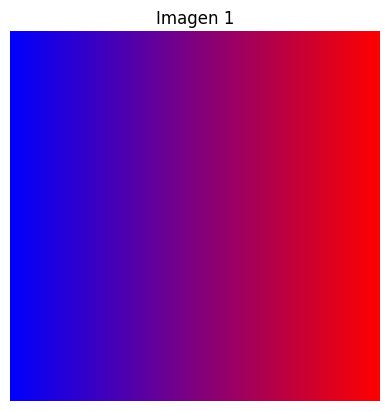

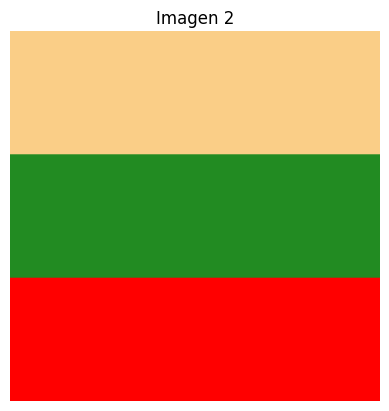

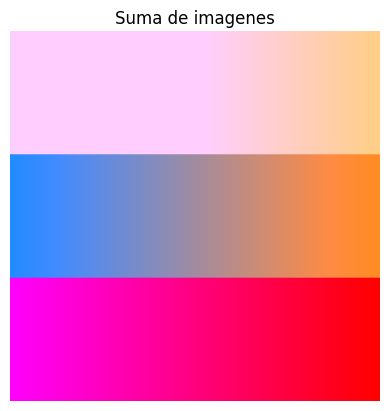

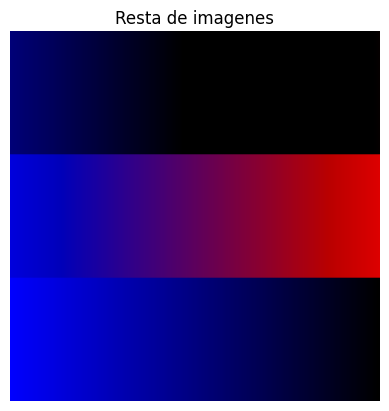

Canales de la suma:


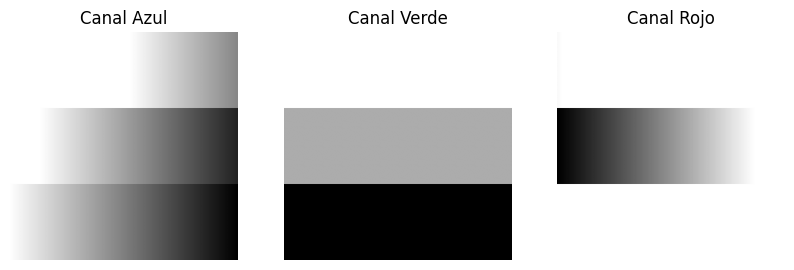

Canales de la resta:


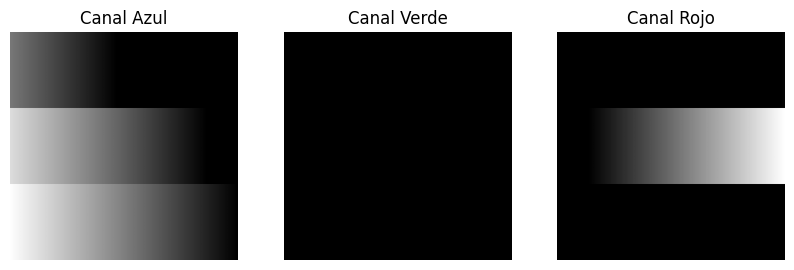

In [64]:
img1 = cv2.imread('img_color1.png')
img2 = cv2.imread('img_color2.png')

img_suma = cv2.add(img1, img2)
img_resta = cv2.subtract(img1, img2)


show_image(img1, 'Imagen 1')
show_image(img2, 'Imagen 2')
show_image(img_suma, 'Suma de imagenes')
show_image(img_resta, 'Resta de imagenes')

b_suma, g_suma, r_suma = cv2.split(img_suma)
b_resta, g_resta, r_resta = cv2.split(img_resta)

# Mostrar los canales de la suma
print('Canales de la suma:')
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(b_suma, cmap='gray')
plt.title('Canal Azul')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g_suma, cmap='gray')
plt.title('Canal Verde')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(r_suma, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')
plt.show()

# Mostrar los canales de la resta
print('Canales de la resta:')
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(b_resta, cmap='gray')
plt.title('Canal Azul')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g_resta, cmap='gray')
plt.title('Canal Verde')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(r_resta, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')
plt.show()

### Las operaciones en imagenes con color se aplican individualmente a cada canal. Puede ocurrir que algunas partes de las imagenes tiendan a blanco si al sumar los valores de RGB el valor de los 3 canales esta cerca de 255. Por el contrario, en la resta pueden tender a negro en los lugares donde sean distintas los pixeles

8. (*) Uso de operadores logicos para reemplazar partes de una imagen: Reemplazar un area especıfica
de una imagen con otra utilizando operadores logicos y relacionales para definir la region de interes
(ROI).